In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
cuPBId="""Day 1	139.82	675.1327861	15.8	76.29164655
Day 2	128.3	619.5074843	31.58	152.4867214
Day 3	122.52	591.5982617	42.21	203.8145823
Day 4	105.75	510.6228875	49.8	240.4635442
Day 5	103.05	497.5857074	60.83	293.7228392
Day 6	96.2	464.5098986	62.5	301.7865765
Day 7	86.43	417.334621	78.95	381.2168035
Day 8	86.13	415.8860454	79.04	381.6513761"""

cAqpPBId="""Day 1	180.13	869.7730565	2.01	9.705456301
Day 2	168.56	813.9063254	10.45	50.4587156
Day 3	157.35	759.7778851	16.32	78.80251086
Day 4	149.02	719.5557702	21.54	104.0077257
Day 5	145.35	701.8348624	23.65	114.1960406
Day 6	143.11	691.0188315	25.51	123.1772091
Day 7	142.44	687.7836794	26.34	127.1849348
Day 8	142.28	687.0111057	26.25	126.7503621"""

In [3]:
uPBId = """Day 1	918.18	80.23
Day 2	829.35	167.2
Day 3	788.21	210.45
Day 4	743.1	253.73
Day 5	691.53	304.12
Day 6	676.16	318.63
Day 7	599.17	398.12
Day 8	597.81	399.65"""
uPVAd="""Day 1	932.15	62.74
Day 2	851.35	142.75
Day 3	810.36	183.63
Day 4	770.12	225.76
Day 5	744.64	251.73
Day 6	725.91	270.82
Day 7	709.51	281.62
Day 8	705.23	287.13"""
AQd = """Day 1	969.23	27.12
Day 2	922.46	72.34
Day 3	889.35	104.54
Day 4	872.53	124.65
Day 5	852.12	144.6
Day 6	837.81	160.32
Day 7	826.91	172.64
Day 8	815.63	179.5"""

Read data

In [4]:
ppm_to_M = 1/58.4e3     # [1ppm = 1 mg/L = 1 mol /58.4e3 mg / L = [M]]
days_to_sec = 1 * 24 * 60 * 60
def getData(v1):
  ar = []
  for spl in v1.splitlines():
    dar = spl.split()
    dar = dar[1:]
    dar2 = [np.float(s) for s in dar]
    #print dar2
    ar.append(dar2)
  ar = np.asarray(ar)
  #print "printing ar", ar
  ar[:,0]*=days_to_sec
  ar[:,1]*=ppm_to_M  
  ar[:,2]*=ppm_to_M  
  return ar  
    
    

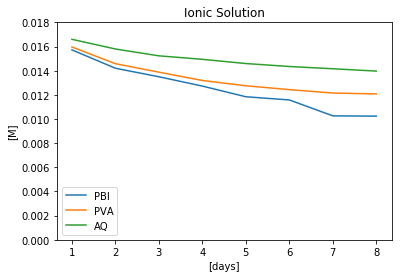

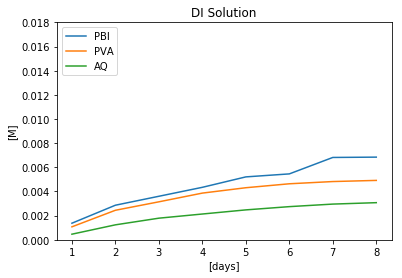

In [6]:
uPBI = getData(uPBId)
uPVA = getData(uPVAd)
AQ = getData(AQd)
plt.figure()


plt.title("Ionic Solution")
plt.ylabel("[M]")
plt.xlabel("[days]")
plt.plot(uPBI[:,0]/days_to_sec,uPBI[:,1],label="PBI")
plt.plot(uPVA[:,0]/days_to_sec,uPVA[:,1],label="PVA")
plt.plot(AQ[:,0]/days_to_sec,AQ[:,1],label="AQ")
plt.ylim(0,0.018)
plt.legend(loc=3)

plt.figure()

#plt.subplot(1,2,2)
plt.title("DI Solution")
plt.ylabel("[M]")
plt.xlabel("[days]")
plt.plot(uPBI[:,0]/days_to_sec,uPBI[:,2],label="PBI")
plt.plot(uPVA[:,0]/days_to_sec,uPVA[:,2],label="PVA")
plt.plot(AQ[:,0]/days_to_sec,AQ[:,2],label="AQ")
plt.ylim(0,0.018)
plt.legend(loc=2)

Assuming conc. change within 1 day is linear 
dc/dt = J_in - J_out = J_in (if J_out=0)
Therefore, J_in = Delta C/Delta T

$$
\begin{align}
{J_A} = \frac{\nabla_A c }{L_{PBI}/(D_{PBI}*\phi) +  L_{PVA}/D_{PVA}}
\end{align}
$$

In [7]:
#J_uPBI = 
M_to_uM = 1e6
DeltaT = 1*days_to_sec
J_PBI = (uPBI[7,2] - uPBI[0,2])/DeltaT #* M_to_uM   # [M/s]
J_PVA = (uPVA[7,2] - uPVA[0,2])/DeltaT #* M_to_uM   # [M/s]


Here,
$$
\begin{align}
{J_A} = \frac{\nabla_A c }{L_{PBI}/D_{PBI}  + (4 L_{PVA})/D_{PBI}}
\end{align}
$$

### Estimating an effective diffusion constant and free volume/area fraction for Aqp-embedded PBI
Here we assume diffusion occurs perpendicular to the plane of a composite film. 

- Based on my pdf derivation for diffusion through a series of layers
$$
J_j = \frac{A \nabla_j c}{L_{PBI}/D_{eff,PBI} + L_{film}/D_{film}}
$$
where $\Delta c$ is the concentration gradient across the PBI/film composite $j$ of area $A$, $L_i$ is the length of phase $i$, and $D_i$ is a diffusion constant within a phase. We use $D_{eff,PBI}$ for the PBI phase, since the diffusion constant will scale with the accessible volume fraction $\phi$ (e.g. $D_{eff} = \phi D$), given cylindrical occlusions (aquaporins) parallel to the applied concentration gradient. 

For clarity, we'll let $\kappa_i = L_i/D_i$, s.t. 
$$
J = \frac{A \nabla c}{\kappa_{PBI} + \kappa_{film}/\phi}
$$

- In this study, we have an unmodified PBI membrane for which we let $\phi_u=1$ (e.g. unobstructed NaCl diffusion) and the modified PBI membrane, for which $\phi_A \le 1$. 

We can estimate $\phi$ for the modified membrane by using the $J_j$ and $\nabla_j c$ values for each configuration $j$ from the exptl measurements and assume that $A$ and $\kappa_i$ are fixed. 
Here,
$$
\begin{align}
\frac{J_A}{J_u} &= \frac{\nabla_A c (\kappa_{PBI} + \kappa_{film})}{\nabla_u c (\kappa_{PBI} + \kappa_{film}/\phi)}
\end{align}
$$

Letting $\gamma \equiv \frac{J_A \Delta_u c}{J_u \Delta_A c}$, we obtain
$$
\begin{align}
\gamma &=   \frac{(\kappa_{film} + \kappa_{PBI})}{ (\kappa_{film} + \kappa_{PBI}/\phi)}\\
\Rightarrow \phi_A &= \frac{ \gamma\kappa_{film} }{\kappa_{film}-(\gamma-1)\kappa_{PBI} }\\
\phi_A &= \frac{ \gamma}{1-(\gamma-1)\kappa_{PBI}/\kappa_{film} }
\end{align}
$$

Hence, $\phi_A$ can be estimated by evaluating $\gamma$ over a range of $J_j$ values, since we are assuming that $\kappa_{PBI}/\kappa_{film}$ are constant. 



### Application of the model to proof-of-concept estimates

In the system described, we'll assume that the same concentration gradient is applied to both the unmodified and Aqp membranes (e.g. $\Delta_u c = \Delta_A c $) and for the sake of example, 
- $D_{PBI} = 3 D_{film}$ 
- $L_{PBI} = 10 $[nm]
s.t.
$ \kappa_{film}/\kappa_{PBI} = L_{film} /(20.)$

We can use this information to probe $\phi$ both as a function of measured $\gamma = J_A/J_u$ and $L_{film}$. Note that we expect $J_A\in [0,J_u]$. 

Another note: I used $D_{eff} = \phi D$, but technically I think any function can be used, so long as $D_{eff} = f(\vec{x}) D$ holds true (that is, $f$ is independent of D). This would then permit corrections to $D_{eff}$ that can be functions of morphology, orientation, system configuration etc. As a simple case, for a composite with spherical, non-conductive inclusions, $D_{eff}/D = f(\phi) = \phi/(2-\phi)$.

Text(0.5,0,'$\\gamma$')

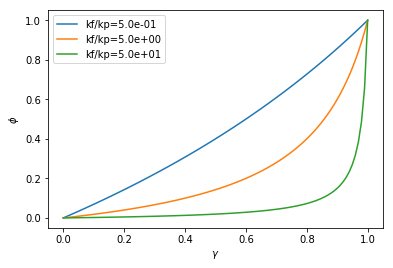

In [8]:
g = np.linspace(0,1,100)  # gamma, assuming D_A c = D_u c
Lfilm = [10,100,1000]  # length of film 

for Lfilmi in Lfilm:
 kf_kp = Lfilmi / 20.   # kfilm/kpbi with assumptions above   
 plt.plot(g,g/(1-(g-1)*kf_kp),label="kf/kp=%3.1e"%kf_kp)

plt.legend(loc=0)    
plt.ylabel("$\phi$")
plt.xlabel("$\gamma$")

The plotted data indicate that the ratio of concentration fluxes can be used to determine the free volume fraction in the Aqp-modified phase, with the obvious conclusions that as 
- $\phi \rightarrow 0$,  $\gamma \rightarrow 0$ which implies $J_A \rightarrow 0$.
- $\phi \rightarrow 1$, $\gamma \rightarrow 1$ which implies $J_A \rightarrow J_u$.

The plots as a function of $L_{film}$ merely indicate that the $\phi$ and $\gamma$ co-dependence will be more apparent as the film layer thickness is reduced.

Once $\phi$ is determined, we can use a simple approximation for the effective diffusion rate in a composite for which the conductivity of the phases is independent of $x$, the direction of diffusion. This would apply, for instance, in the case of cyclinders that are embedded in a composite in an orientation parallel to the concentration gradient, as mentioned before. This configuration permits $\phi$ to be determined by the area fraction of cyclinders in the composite:

$$
\begin{align}
\phi &= \frac{A - n\pi r^2}{A}\\
     &= 1 - \frac{n}{A}\pi r^2 \\
     &= 1 - \rho \pi r^2\\ 
\end{align}
$$

where $\rho$ is the number density of inclusions and $r$ is the impenetrable radius of each pore. 

For more complicated inclusion geometries or for other factors beyond volume fraction that determine the effective diffusion rate (such as ionic strength), numerical methods can be used to estimate $\phi$ (as we have done previously). 




### Application of the model to data

Returning to the diffusion cell data, I think its unusual that the rates of concentration decrease of NaCl are indentical in one end but different in another end. That said, as an exercise we can still obtain $\gamma$ by assuming
- $J_{t_1\rightarrow t_2} = \frac{c(r,t_1) - c(r,t_0)}{t_1-t_0}$ in the 'right' end of the diffusion cell (since the system is closed and thus no material enters/leaves, except through the film boundary
- $\Delta_j c(t_i) = c(l,t_i) - c(r,t_i)$

In [9]:
delT = 86400. # [s]

def calcJ(cs,delT):
  J_ =  cs[1:] - cs[:-1]
  J_ /= delT
  return J_

J_u = calcJ(uPBI[:5,2],delT)
J_A = calcJ(uPVA[:5,2],delT)
J_Q = calcJ(AQ[:5,2],delT)

def delc(cs):
    delci = cs[:,1] - cs[:,2]
    avgs = 0.5*(delci[1:] + delci[:-1])
    return avgs
    
delc_u = delc(uPBI)[:4]
delc_A = delc(uPVA)[:4]
delc_Q = delc(AQ)[:4]


Grabbing the flux-concentration relations to compare against water permeability data

In [10]:
PBI_flow = J_u/delc_u
PVA_flow = J_A/delc_A
AQ_flow = J_Q/delc_Q
print AQ_flow
print PBI_flow

In [15]:
gamma = ((J_A / J_Q) * (delc_Q/delc_A)) # this yields D_PVA/D_AQ
